# CC5205-3 ¬∑ Miner√≠a de Datos
## Hito 1 ¬∑ Semestre 2025-1

### Integrantes
- Sof√≠a Carmona F.
- Tom√°s Ubilla Zavala  
- Loonette Vilelgas B.
- Diego Rojas Wasaff  
- Nahuel Won
### Equipo Docente
- Profesor: Valent√≠n Barriere  
- Auxiliar: Roberto Rivera C.

---


# Introducci√≥n

---
 Spotify es una de las plataformas de streaming musicales m√°s grandes del mundo. Este guarda enormes cantidades de datos sobre canciones, artistas, √°lbumes, caracter√≠sticas mel√≥dicas, entre otras. Analizar y estudiar estos datos puede ayudar a detectar patrones musicales, c√≥mo distintas canciones se relacionan entre s√≠ y c√≥mo organizar estas distintas melod√≠as. Para ello, se analiza un dataset de 114,000 canciones de Spotify, creada por Priyam Choksi, que incluyen variables como popularidad, energ√≠a, valencia, tiempo, g√©nero, entre otras. El an√°lisis de estos datos es interesante porque ayuda a entender y predecir patrones musicales, asi como a agrupar canciones seg√∫n distintas variables mediante distintas t√©cnicas como el clustering. 

# Exploraci√≥n de datos

---


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

spotify = pd.read_csv("data/data_principal.csv")

In [69]:
spotify.describe(include='all')

Unnamed: 0                track_id      artists  \
count   114000.000000                  114000       113999   
unique            NaN                   89741        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.500000                     NaN          NaN   
std      32909.109681                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.750000                     NaN          NaN   
50%      56999.500000                     NaN          NaN   
75%      85499.250000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  114000.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238535   
std                            NaN              NaN      22.305078   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms explicit   danceability         energy  ...  \
count   1.140000e+05   114000  114000.000000  114000.000000  ...   
unique           NaN        2            NaN            NaN  ...   
top              NaN    False            NaN            NaN  ...   
freq             NaN   104253            NaN            NaN  ...   
mean    2.280292e+05      NaN       0.566800       0.641383  ...   
std     1.072977e+05      NaN       0.173542       0.251529  ...   
min     0.000000e+00      NaN       0.000000       0.000000  ...   
25%     1.740660e+05      NaN       0.456000       0.472000  ...   
50%     2.129060e+05      NaN       0.580000       0.685000  ...   
75%     2.615060e+05      NaN       0.695000       0.854000  ...   
max     5.237295e+06      NaN       0.985000       1.000000  ...   

             loudness           mode    speechiness   acousticness  \
count   114000.000000  114000.000000  114000.000000  114000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258960       0.637553       0.084652       0.314910   
std          5.029337       0.480709       0.105732       0.332523   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.598000   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      114000.000000  114000.000000  114000.000000  114000.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156050       0.213553       0.474068     122.147837   
std             0.309555       0.190378       0.259261      29.978197   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.218750   
50%             0.000042       0.132000       0.464000     122.017000   
75%             0.049000       0.2730

Se puede observar las columnas y cuantas filas tiene cada una; el promedio, la varianza , el m√≠nimo, el m√°ximo y los percentiles de las variables num√©ricas del dataset.

- "Unnamed: 0" no es una columna que aporte informaci√≥n.
- "duration_ms" est√° en otra escala, al igual que "popularity" y "tempo"


In [70]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

No existe una gran proporci√≥n de nulos: solo 1 en 3 columnas.
Existe solo 1 columna booleana: "explicit".

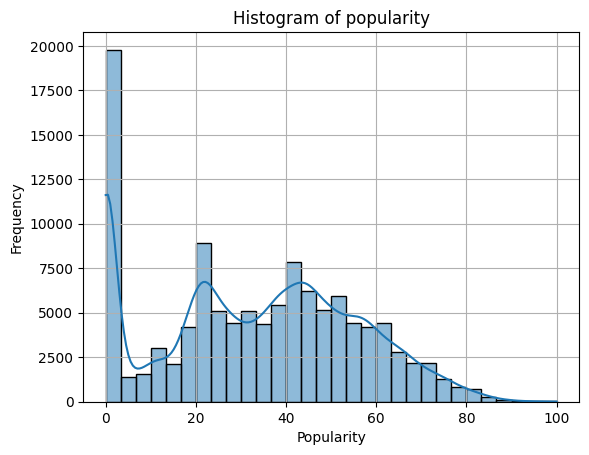

In [71]:
# Histograma de popularidad de las canciones
sns.histplot(spotify['popularity'], bins=30, kde=True)

plt.title('Histogram of popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Gran cantidad de las canciones tiene popularidad 0 o muy baja, mientras que una cantidad baja respecto al total tiene una popularidad alta o cercana a 100.

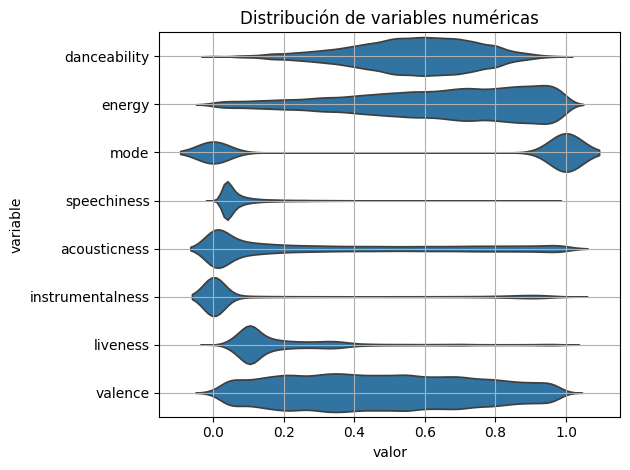

In [72]:
numericas = spotify.select_dtypes(include='number').drop(columns=['Unnamed: 0', 'duration_ms', 'tempo', 'popularity', 'loudness', 'key', 'time_signature'])

long_df = pd.melt(numericas, var_name='variable', value_name='valor')

sns.violinplot(data=long_df, x='valor', y='variable', orient='h', inner=None, scale='width')
plt.title('Distribuci√≥n de variables num√©ricas')
plt.grid()
plt.tight_layout()
plt.show()

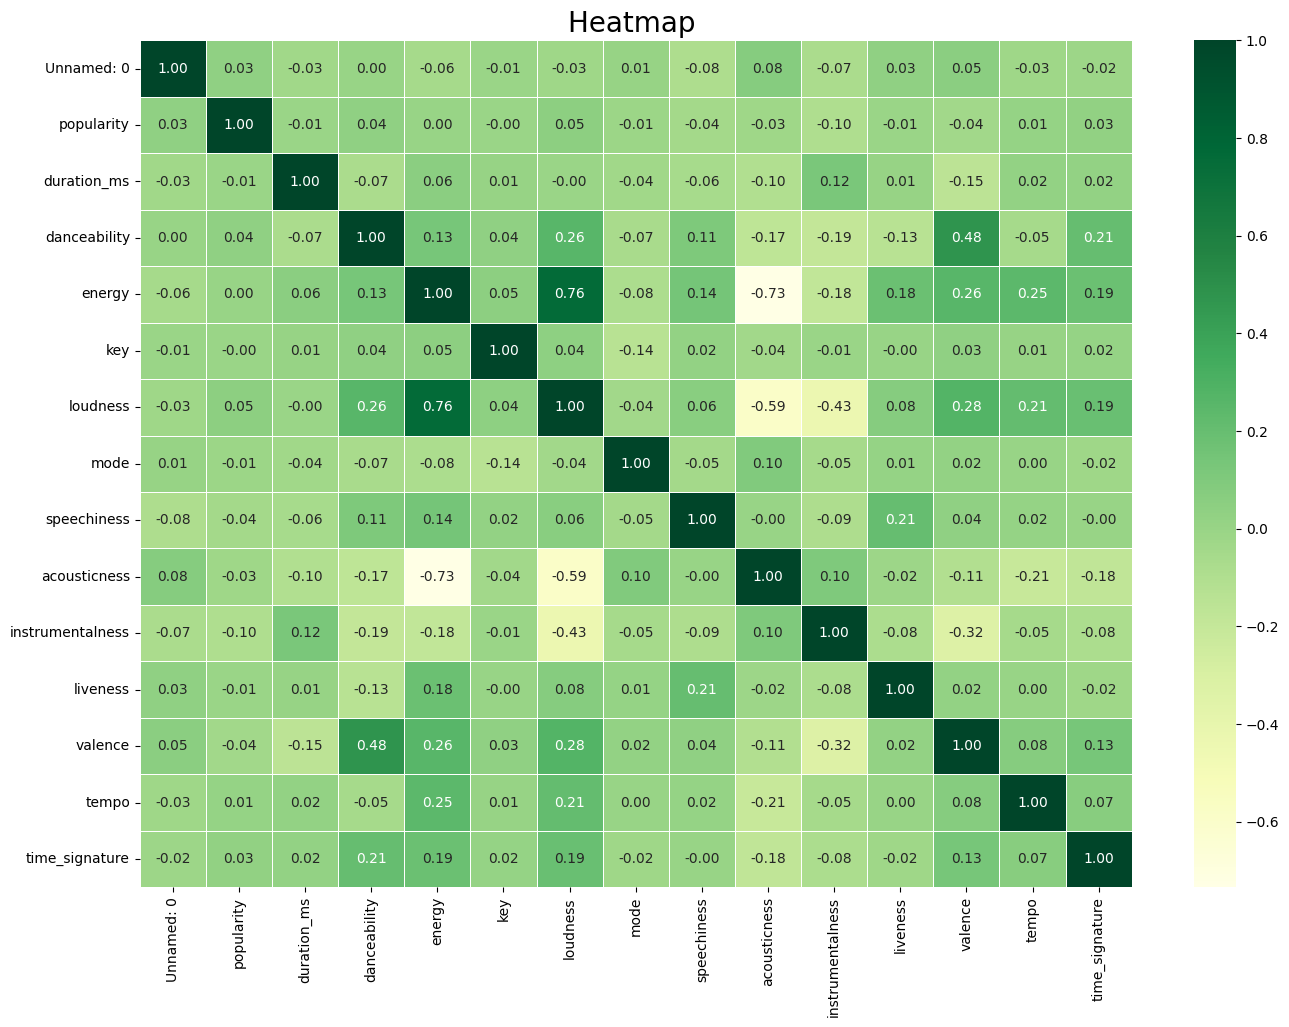

In [73]:
##HeatMap para todas las correlaciones de los atributos de la tabla
##Estudio de las correlaciones entre atributos

numeric_cols = spotify.select_dtypes(include=['number']).columns

f, ax = plt.subplots(figsize=(16, 11))

corr_matrix = spotify[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f", linewidths=.5)



plt.title('Heatmap ', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


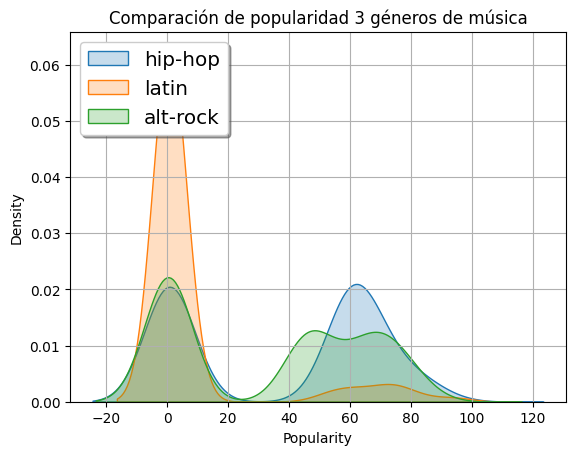

In [74]:
fig, ax = plt.subplots()

hip_hop = spotify[spotify['track_genre'] == 'hip-hop']
latin = spotify[spotify['track_genre'] == 'latin']
rock = spotify[spotify['track_genre'] == 'alt-rock']
sns.kdeplot(hip_hop['popularity'], label='hip-hop', ax=ax, fill=True)
sns.kdeplot(latin['popularity'], label='latin', ax=ax, fill=True)
sns.kdeplot(rock['popularity'], label='alt-rock', ax=ax, fill=True)

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

ax.set_title('Comparaci√≥n de popularidad 3 g√©neros de m√∫sica')
ax.set_xlabel('Popularity') # Update x-axis label

plt.grid()
plt.show()

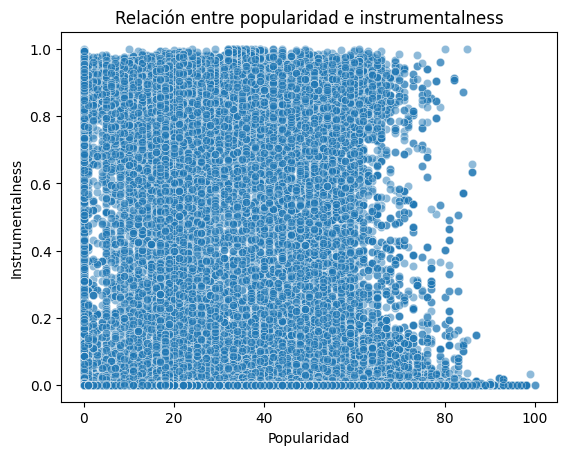

Correlaci√≥n popularity vs instrumentalness: -0.09513920344466378


In [75]:
sns.scatterplot(data=spotify, x='popularity', y='instrumentalness', alpha=0.5)
plt.title('Relaci√≥n entre popularidad e instrumentalness')
plt.xlabel('Popularidad')
plt.ylabel('Instrumentalness')
plt.show()

# Correlaci√≥n
print("Correlaci√≥n popularity vs instrumentalness:", spotify[['popularity', 'instrumentalness']].corr().iloc[0,1])

No se observa tendencia clara, pero no existen registros con alta popularidad y alta "instrumentalness"

# Preguntas y Problemas

---
* ¬øSe puede predecir el g√©nero de una canci√≥n en base a otras variables?
* ¬øAplicar Clustering permite generar grupos que aporten informaci√≥n al modelo?
* ¬øC√≥mo var√≠a el sentimiento predominante de las canciones de los diferentes g√©neros?


# Propuesta experimental

---

## P1

* Aplicar modelos de clasificaci√≥n para predecir el g√©nero de una canci√≥n:


## P2


* Evaluar clustering para encontrar grupos de canciones similares: Aplicar distintos m√©todos de clustering como K-Means y DBSCAN


## P3

Se plantea como hip√≥tesis que cada canci√≥n tiene un sentimiento predominante en funci√≥n de su letra, y que cada g√©nero musical presenta una tendencia promedio de sentimiento, dada por las canciones que lo componen. Para validar esta hip√≥tesis, se propone el siguiente enfoque metodol√≥gico:

En primer lugar, se combinar√° la base de datos actual con fuentes externas que contengan la letra de cada canci√≥n, utilizando como claves el nombre de la canci√≥n y el nombre del artista. Esta integraci√≥n permitir√° conservar los atributos originales y a√±adir el contenido l√≠rico a cada registro.

Por simplicidad, se trabajar√° inicialmente solo con canciones en ingl√©s, para facilitar el an√°lisis de sentimiento utilizando herramientas preexistentes. Luego, se aplicar√° TF-IDF para transformar las letras en representaciones num√©ricas a trav√©s de vectores que capturen la relevancia de las palabras dentro del corpus.

Teniendo esto, se propone utilizar un modelo de an√°lisis de sentimiento preentrenado para estimar el sentimiento predominante de cada letra, etiquetando cada canci√≥n como positiva, negativa o neutral. Tambi√©n se puede agrupar por g√©nero, donde se calcular√° la distribuci√≥n y el promedio de sentimiento por g√©nero musical, y se analizar√°n posibles patrones o diferencias.

Este enfoque permitir√° explorar si existe una relaci√≥n entre el g√©nero musical y el tipo de emociones predominantes en sus letras.

# Experimento preliminar

---

## Pregunta 1 : Predicci√≥n

En la siguiente secci√≥n se investigar√° y discutir√° la pregunta:
¬øEs posible predecir el g√©nero musical mediante los otros atributos de la tabla?
Para ello se utilizaron distinas t√©cnicas de preprocesamiento y se usar√°n 2 t√©cnicas de clasificaci√≥n:
    
    -K neighbors 
    -Random Forest

Para el modelo KNN se pre-proces√≥  el dataframe escalando los datos con MinMaxScaler y se busc√≥ el mejor K con GridSearchCV. Los resultados fueron los siguientes: 
        
        .F1 para kneighbors sin weigths: 0.15261185805598412
        .F1 para kneighbors con weigths: 0.16424950407758432

Estos resultados pueden estudiarse en el c√≥digo adjunto.

Debido al bajo porcentaje de √©xito y evaluando que el data frame original ten√≠a muchos atributos relevantes para la predicci√≥n, lo cual no es conveniente para este modelo, se procedi√≥ a utilizar el modelo de Random Forest, que no depende de la cantidad de atributos. Para ello, se escalaron los datos y se eval√∫o el porcentaje accurecy, que fue de m√°s o menos un 30% de √©xito. 

Debido al bajo porcentaje de predicci√≥n que se obtuvo, se procesaron los datos con otras t√©cnicas. Primero se consider√≥ que la cantidad de clases que el modelo deb√≠a aprender eran muchas, por lo que se cre√≥ un diccionario de los g√©neros como muestra el siguiente c√≥digo.

In [ ]:
##Creamos un diccionario de g√©neros, agrupando los g√©neros m√°s parecidos entre s√≠.
dic_generos = {
    'latin': ['latin', 'latino', 'reggaeton', 'spanish', 'sertanejo', 'samba', 'tango','brazil', 'forro', 'salsa','mpb'],
    'rock_clasico' :['rock', 'alt-rock', 'rock-n-roll', 'garage', 'rockabilly', 'psych-rock', 'j-rock'],
    'metal': ['death-metal', 'black-metal', 'heavy-metal', 'metal-core', 'grindcore', 'metal','metalcore'],
    'rock_intenso' : ['punk', 'punk-rock', 'hardcore', 'grunge', 'emo', 'goth', 'hard-rock'],
    'pop': [ 'pop', 'world-music', 'pop-film', 'power-pop','british'],
    'pop-asia':['k-pop', 'j-pop', 'mandopop', 'cantopop', 'j-idol', 'j-dance'],
    'hiphop': ['trip-hop', 'hip-hop'],
    'disco': ['groove', 'dance', 'dancehall','disco'],
    'tech_club' : ['house', 'deep-house', 'minimal', 'minimal-techno','techno', 'chicago-house', 'detroit-techno', 'electro', 'club', 'hardstyle','edm'],
    'tech_exp' : ['dubstep', 'idm', 'breakbeat', 'electronic', 'industrial','afrobeat', 'drum-and-bass', 'dub', 'party'],
    'chill': ['study', 'ambient', 'acoustic', 'sleep', 'chill', 'trance', 'new-age','progressive-house','sad'],
    'reggae': ['ska', 'reggae','dancehall'],
    'classic': ['opera', 'classical', 'piano','gospel','show-tunes'],
    'kids': ['kids', 'disney', 'children'],
    'country': ['bluegrass', 'honky-tonk','country'],
    'blues': ['soul', 'funk', 'blues','r-n-b','jazz'],
    'romance': ['romance','singer-songwriter','songwriter'],
    'folklore': ['folk', 'turkish', 'iranian','indian','pagode','german','swedish','malay','french'],
    'other':['happy','comedy', 'guitar','anime'],
    'indie':['indie','alternative','indie-pop','synth-pop']
}

In [ ]:
dic_generos_numerico = {}
i = 0
for genero_principal, subgeneros in dic_generos.items():
    dic_generos_numerico[genero_principal] = i
    i += 1

mapeo_directo = {}
for genero_general, subgeneros in dic_generos.items():
    for sub in subgeneros:
        mapeo_directo[sub] = genero_general

df_spotify_forest['genero_general'] = df_spotify_forest['track_genre'].map(mapeo_directo)

df_spotify_forest['genero_numeric'] = df_spotify_forest['genero_general'].map(dic_generos_numerico)
df_spotify_filtrado = df_spotify_forest.dropna(subset=['genero_numeric']).copy()
df_spotify_filtrado['genero_numeric'] = df_spotify_filtrado['genero_numeric'].astype(int)
df_spotify_filtrado.head()

Como se quiere trabajar con n√∫meros, se us√≥ LabelEncoder para las columnas con variables categ√≥ricas. Estas fueron artists y album_name, la cuales pod√≠an aportar informaci√≥n sobre el g√©nero al que pertenec√≠an. En general, incluir este cambio aument√≥ entre 3%-4% la predicci√≥n del modelo.

In [ ]:
df_spotify_filtrado.drop(['genero_general','track_genre'], axis = 1, inplace = True)
cat_cols = df_spotify_filtrado.select_dtypes(include=['object']).columns.to_list()
num_cols = [col for col in df_spotify_filtrado.columns if col not in cat_cols]
df_spotify_filtrado[cat_cols] = df_spotify_filtrado[cat_cols].apply(LabelEncoder().fit_transform)
y = df_spotify_filtrado['genero_numeric']
X=df_spotify_filtrado.drop(['genero_numeric'], axis = 1)

Finalmente, se entren√≥ el modelo con los datos escalados. El n√∫mero de estimadores y profundidad del Random Forest fue estudiado, no obstante, el aumento de la predicci√≥n no era tan significante y el costo de ejecuci√≥n si, se opt√≥ por el n√∫mero de estimadores por default. 

Con el siguiente c√≥digo se obtuvo un 47% de √©xito en la predicci√≥n.

In [ ]:
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()
X_train,X_test,y_train,y_test=train_test_split(df_X_scaled,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

Para visualizar mejor los resultados, observaremos con una matriz de confusi√≥n la predicci√≥n del modelo.

In [ ]:
![image.png](attachment:image.png)

**An√°lisis de resultados**
    
    *De la matriz podemos observar que g√©neros como Disco, Latin y Hip-Hop son algunos  que al modelo le cuesta predecir correctamente. Esto puede deberse a la construcci√≥n del diccionario y sus sesgos como al parecido t√©cnico que tienen estos con otros g√©neros. 

    *Si bien hubo un aumento del 17% de √©xito con el Random Forest inicial al √∫ltimo entrenado con un mejor procesamiento de datos, el procentaje de √©xito sigue siendo bajo. Si disminuimos los atributos del data set para tratar de predecir el g√©nero, disminuir√° considerablemente el √©xito de la predicci√≥n, por lo que no es posible predecir con certeza o al menos una buena posibilidad el g√©nero musical de una canci√≥n. 

    *Disminuir las clases de g√©neros ayud√≥ mucho al modelo a entender mejor los datos entregados y la funci√≥n de los atributos sobre un g√©nero, sin embargo, esta adici√≥n al modelo trae los sesgos de quien crea el diccionario.

    *Con respecto a los otros modelos, el estudio de KNN fue con un preprocesamiento m√≠nimo y el descarte se debi√≥ a que, en teor√≠a, la relevancia de los atributos no era insignificante como para descartarlas por lo tanto se opt√≥ por entrenar modelos que no les afectara tanto una gran dimensionalidad. Por otra parte, SVM se us√≥ para probar el rendimiento de los datos preprocesados en otro modelo que no fuera el Random Forest. Entonces, no se descartar√° su uso a futuro y se estudiar√°n otras t√©cnicas de preprocesamiento que sean m√°s favorables para este modelo en particular.

    *En la investigaci√≥n se usaron otro tipo de procesamientos como PCA y otras m√©tricas para la predicci√≥n, pero no aumentaron el porcentaje de √©xito. Por lo tanto, ser√° necesario investigar otros preprocesamientos que aumenten este porcentaje y/o cruzar datos que nos entreguen m√°s informaci√≥n sobre el g√©nero de las canciones.

## P2

## P3

A trav√©s de la combinaci√≥n de dataframes obtenidos, se cre√≥ un nuevo dataframe que tiene la letra de cada canci√≥n. 

In [93]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df12 = pd.read_excel(r"data/Spotify con lyrics-v0_1-2.xlsx")
df22 = pd.read_excel(r"data/Spotify con lyrics-v0_2-2.xlsx")

df2 = pd.concat([df12, df22], ignore_index=True)
df2

track_id                artists  \
0      3v6ypsJzaoY2xgYp6mMJfM                 !nvite   
1      1d4ZvL8uuUPTEAnocC3zEa                 !nvite   
2      4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3      5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4      6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
...                       ...                    ...   
89736  4xZIMRwaaBx7CZMmM6KLuh                    ÈªÉÂ∞èÁê•   
89737  1Q5d3X55pI7nBXYAdZ0g8Z                    ÈªÉÊïèËèØ   
89738  1t4LWH3LrFAwCTHgUKM16s                ÈæçËóèRyuzo   
89739  5Qn6Ys1fHlef8zgCLqCdud                ÈæçËóèRyuzo   
89740  1kR4gIb7nGxHPI3D2ifs59                    NaN   

                                  song  \
0                             pagadoff   
1                            strolling   
2                   Going on a Mission   
3      Puppy Dog Pals Main Title Theme   
4                  Good Enough for Now   
...                                ...   
89736                            Ê≤íÈÇ£È∫ΩÁ∞°ÂñÆ   
89737                               Â†§Â≤∏   
89738             Á¥ÖËìÆ„ÅÆÂºìÁü¢ (Instrumental)   
89739           „Ç≤„Ç≤„Ç≤„ÅÆÈ¨ºÂ§™ÈÉé (Instrumental)   
89740                              NaN   

                                                  lyrics  
0                                                    NaN  
1                                                    NaN  
2      Let's go!\n ‚ô™\n On your bark, get ready, got a...  
3      Bingo and Rolly, couple of puppies\n They bark...  
4      Oh, I couldn't live a single day without you\n...  
...                                                  ...  
89736  Ê≤íÈÇ£È∫ºÁ∞°ÂñÆ Â∞±ËÉΩÊâæÂà∞ ËÅäÂæó‰æÜÁöÑ‰º¥\n Â∞§ÂÖ∂ÊòØÂú® ÁúãÈÅé‰∫ÜÈÇ£È∫ºÂ§öÁöÑËÉåÂèõ\n Á∏ΩÊòØ‰∏çÂÆâ Âè™Â•ΩÂº∑ÊÇç\...  
89737  ÂØíÂ§úÊÇÑÈùú Ë°óÁáàÊõ¥È°ØÊòèÈªÉ\n Á´ôÂ≤∏Â†§ËÅΩÊ∞¥ËÅ≤ ËàáÂÆÉ‰ΩéËÅ≤Âî±\n ÂøÉ‰∏≠ÊÅ¨ÈùúÊ®ÇÊö¢\n ÁÑ°Ë¨ÇÂ§öÊÜÇÂÇ∑ Â∞áÈ¨±...  
89738                                                NaN  
89739                                                NaN  
89740  Ven, bailalo\n Ay, ven, bailalo\n Ven, gozalo\...  

[89741 rows x 4 columns]

Luego de generar el nuevo dataframe, se utiliza un algoritmo para detectar el idioma de la letra, se clasifica cada canci√≥n con el idioma correspondiente, y se filtra para mantener √∫nicamente canciones en ingl√©s. 

In [77]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
tqdm.pandas()

def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return "unknown"

df2['idioma'] = df2['lyrics'].progress_apply(lambda x: detectar_idioma(x) if pd.notnull(x) else "missing")

df2.head(5)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 89741/89741 [06:32<00:00, 228.45it/s]


track_id                artists  \
0  3v6ypsJzaoY2xgYp6mMJfM                 !nvite   
1  1d4ZvL8uuUPTEAnocC3zEa                 !nvite   
2  4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3  5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4  6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   

                              song  \
0                         pagadoff   
1                        strolling   
2               Going on a Mission   
3  Puppy Dog Pals Main Title Theme   
4              Good Enough for Now   

                                              lyrics   idioma  
0                                                NaN  missing  
1                                                NaN  missing  
2  Let's go!\n ‚ô™\n On your bark, get ready, got a...       en  
3  Bingo and Rolly, couple of puppies\n They bark...       en  
4  Oh, I couldn't live a single day without you\n...       en

In [78]:
df2 = df2[df2["idioma"] == "en"]

### TF - IDF

Se genera una representaci√≥n vectorial, pero limitada porque depende del corpus con el que se entrena (local).

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import spacy
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

nlp_es = spacy.load('es_core_news_sm') # modelo de spaCy en espa√±ol

# TF-IDF vectorizer solo para visualizaci√≥n de palabras importantes
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df2['lyrics'].fillna(''))
tfidf_array = X_tfidf.toarray()

df3 = df2.copy()
df3['tfidf_vector'] = list(tfidf_array)
df3.head()

track_id                artists  \
2  4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3  5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4  6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
5  6LlUAzeDR4D5y0YsCkAlFO    "Weird Al" Yankovic   
6  4uPOZjjtf8hwD7uxArwVh4    "Weird Al" Yankovic   

                                                song  \
2                                 Going on a Mission   
3                    Puppy Dog Pals Main Title Theme   
4                                Good Enough for Now   
5  Gump (Parody of "Lump" by The Presidents of th...   
6  Trapped In the Drive-Thru (Parody of "Trapped ...   

                                              lyrics idioma  \
2  Let's go!\n ‚ô™\n On your bark, get ready, got a...     en   
3  Bingo and Rolly, couple of puppies\n They bark...     en   
4  Oh, I couldn't live a single day without you\n...     en   
5  Gump sat alone on a bench in the park\n "My na...     en   
6  Seven o'clock in the evening\n Watchin somethi...     en   

                                        tfidf_vector  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.078...  
6  [0.0, 0.0, 0.02172021028127844, 0.0, 0.0209077...

### Polaridad por palabra: TextBlob

In [80]:
from textblob import TextBlob
from tqdm import tqdm

tqdm.pandas()

# Funci√≥n de an√°lisis de sentimiento (ahora con subjetividad)
def analizar_sentimiento_completo(texto, idioma):
    if pd.isnull(texto):
        return (0.0, 0.0)  # Devolvemos polaridad y subjetividad como una tupla
    
    try:
        if idioma == 'en':
            blob = TextBlob(texto)
            return (blob.sentiment.polarity, blob.sentiment.subjectivity)
    
        else:
            return (0.0, 0.0)
    except Exception as e:
        print(f"Error al analizar el texto '{texto}': {e}")
        return (0.0, 0.0)

df2[['sentimiento', 'subjetividad']] = df2.progress_apply(lambda row: pd.Series(analizar_sentimiento_completo(row['lyrics'], row['idioma'])), axis=1)

df2.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32092/32092 [01:11<00:00, 445.88it/s]


track_id                artists  \
2  4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3  5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4  6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
5  6LlUAzeDR4D5y0YsCkAlFO    "Weird Al" Yankovic   
6  4uPOZjjtf8hwD7uxArwVh4    "Weird Al" Yankovic   

                                                song  \
2                                 Going on a Mission   
3                    Puppy Dog Pals Main Title Theme   
4                                Good Enough for Now   
5  Gump (Parody of "Lump" by The Presidents of th...   
6  Trapped In the Drive-Thru (Parody of "Trapped ...   

                                              lyrics idioma  sentimiento  \
2  Let's go!\n ‚ô™\n On your bark, get ready, got a...     en     0.423854   
3  Bingo and Rolly, couple of puppies\n They bark...     en    -0.100000   
4  Oh, I couldn't live a single day without you\n...     en     0.245615   
5  Gump sat alone on a bench in the park\n "My na...     en    -0.057212   
6  Seven o'clock in the evening\n Watchin somethi...     en    -0.017307   

   subjetividad  
2      0.603333  
3      0.200000  
4      0.588183  
5      0.612821  
6      0.514231

Se genera la columna "clasificacion", usando un umbral de +- 0.1

In [81]:
df2['clasificacion'] = df2['sentimiento'].apply(
    lambda x: 'positivo' if x > 0.1 else ('negativo' if x < -0.1 else 'neutral')
)

df2['clasificacion'].value_counts()

clasificacion
positivo    14952
neutral     12656
negativo     4484
Name: count, dtype: int64

Existe una mayor frecuencia de canciones positivas, en comparaci√≥n a las negativas.

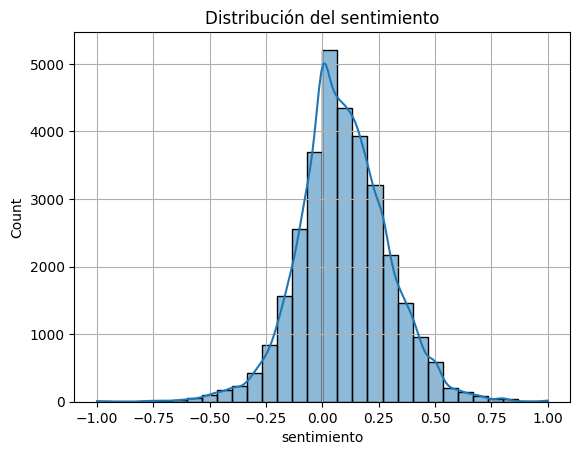

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['sentimiento'], bins=30, kde=True)
plt.title('Distribuci√≥n del sentimiento')
plt.grid()
plt.show()

La mayor√≠a de las canciones tienden a ser m√°s positivas (recordar que la m√©trica para ver positividad solo es la cantidad de adjetivos positivos)

Artistas con sentimiento promedio m√°s positivo

In [83]:
df2.groupby('artists')['sentimiento'].mean().sort_values(ascending=False).head(10)

artists
At17                                   1.000000
Vini Vici;Pixel                        0.976562
Evil Activities;Chaosphere             0.850000
yetep;Olmos                            0.850000
Shenseea;Tyga                          0.827018
ILLENIUM;Call Me Karizma;Hex Cougar    0.800781
AcesToAces                             0.800000
Neolux                                 0.800000
LiSA                                   0.800000
HYDE                                   0.800000
Name: sentimiento, dtype: float64

Canciones m√°s positivas:

In [84]:
df2.sort_values('sentimiento', ascending=False)[['song', 'artists', 'sentimiento']].head(5)  # m√°s positivas
df2.sort_values('sentimiento')[['song', 'artists', 'sentimiento']].head(5)  # m√°s negativas

song   artists  sentimiento
35318             Mortado  Impetigo         -1.0
7518   DRAMATIC? DRASTIC!     BO√òWY         -1.0
29835               Faith     Ghost         -1.0
22776            Sentence       ERA         -1.0
64617  I Wanna Be Sedated   Ramones         -1.0

### Merge con el dataframe original

In [85]:
original = pd.read_csv(r"data\data_principal.csv")
original = original.drop(columns=['Unnamed: 0'])

spotify = df2.merge(original, on="track_id", how="left")
spotify = spotify.drop_duplicates()
spotify.head()

track_id              artists_x  \
0  4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
1  5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
2  6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
3  6LlUAzeDR4D5y0YsCkAlFO    "Weird Al" Yankovic   
4  4uPOZjjtf8hwD7uxArwVh4    "Weird Al" Yankovic   

                                                song  \
0                                 Going on a Mission   
1                    Puppy Dog Pals Main Title Theme   
2                                Good Enough for Now   
3  Gump (Parody of "Lump" by The Presidents of th...   
4  Trapped In the Drive-Thru (Parody of "Trapped ...   

                                              lyrics idioma  sentimiento  \
0  Let's go!\n ‚ô™\n On your bark, get ready, got a...     en     0.423854   
1  Bingo and Rolly, couple of puppies\n They bark...     en    -0.100000   
2  Oh, I couldn't live a single day without you\n...     en     0.245615   
3  Gump sat alone on a bench in the park\n "My na...     en    -0.057212   
4  Seven o'clock in the evening\n Watchin somethi...     en    -0.017307   

   subjetividad clasificacion              artists_y  \
0      0.603333      positivo  "Puppy Dog Pals" Cast   
1      0.200000       neutral  "Puppy Dog Pals" Cast   
2      0.588183      positivo    "Weird Al" Yankovic   
3      0.612821       neutral    "Weird Al" Yankovic   
4      0.514231       neutral    "Weird Al" Yankovic   

                            album_name  ... loudness  mode  speechiness  \
0  Puppy Dog Pals: Disney Junior Music  ...   -3.839     0       0.0470   
1  Puppy Dog Pals: Disney Junior Music  ...   -4.709     1       0.2020   
2                          Polka Party  ...  -13.015     1       0.0291   
3    The Essential "Weird Al" Yankovic  ...   -6.505     1       0.0390   
4    The Essential "Weird Al" Yankovic  ...   -8.998     1       0.0880   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0       0.02100          0.000000     0.093    0.957   93.937               3   
1       0.17100          0.001410     0.202    0.873  182.148               4   
2       0.04750          0.000000     0.209    0.855  130.758               4   
3       0.00837          0.000002     0.294    0.907  144.354               4   
4       0.46000          0.000000     0.222    0.692  108.061               4   

   track_genre  
0     children  
1     children  
2       comedy  
3       comedy  
4       comedy  

[5 rows x 27 columns]

Este dataframe contiene las canciones del dataframe original combinado con el dataframe de letras con sentimiento.

Algunas canciones se repiten porque tienen asociado m√°s de un g√©nero.

Ahora, explorando la nueva informaci√≥n:

In [86]:
# TF-IDF con todo el corpus, pero de nuevo porque cambi√≥ la base al hacer el merge
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(spotify['lyrics'])
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df['track_genre'] = spotify['track_genre'].values

# Ver los g√©neros m√°s comunes
top_generos = spotify['track_genre'].value_counts().head(10).index

for genero in top_generos:
    media = tfidf_df[tfidf_df['track_genre'] == genero].drop(columns='track_genre').mean()
    top_words = media.sort_values(ascending=False).head(10) # podemos ver m√°s palabras subiendo el 10
    print(f"\nüéß Palabras m√°s representativas del g√©nero '{genero}':")
    print(", ".join(top_words.index))


üéß Palabras m√°s representativas del g√©nero 'grunge':
away, ll, don, ve, know, oh, like, just, yeah, let

üéß Palabras m√°s representativas del g√©nero 'metalcore':
don, know, ve, ll, just, like, let, feel, away, fucking

üéß Palabras m√°s representativas del g√©nero 'country':
christmas, don, like, love, just, got, oh, ain, ll, know

üéß Palabras m√°s representativas del g√©nero 'soul':
christmas, oh, love, yeah, baby, claus, know, santa, merry, don

üéß Palabras m√°s representativas del g√©nero 'sad':
don, yeah, know, like, just, love, wanna, got, ll, cause

üéß Palabras m√°s representativas del g√©nero 'dance':
oh, la, yeah, baby, like, know, don, love, just, got

üéß Palabras m√°s representativas del g√©nero 'rock':
oh, christmas, don, ooh, yeah, nick, merry, ll, know, time

üéß Palabras m√°s representativas del g√©nero 'metal':
oh, ve, don, know, away, ll, love, just, yeah, like

üéß Palabras m√°s representativas del g√©nero 'alternative':
oh, don, yeah, love, know, ll

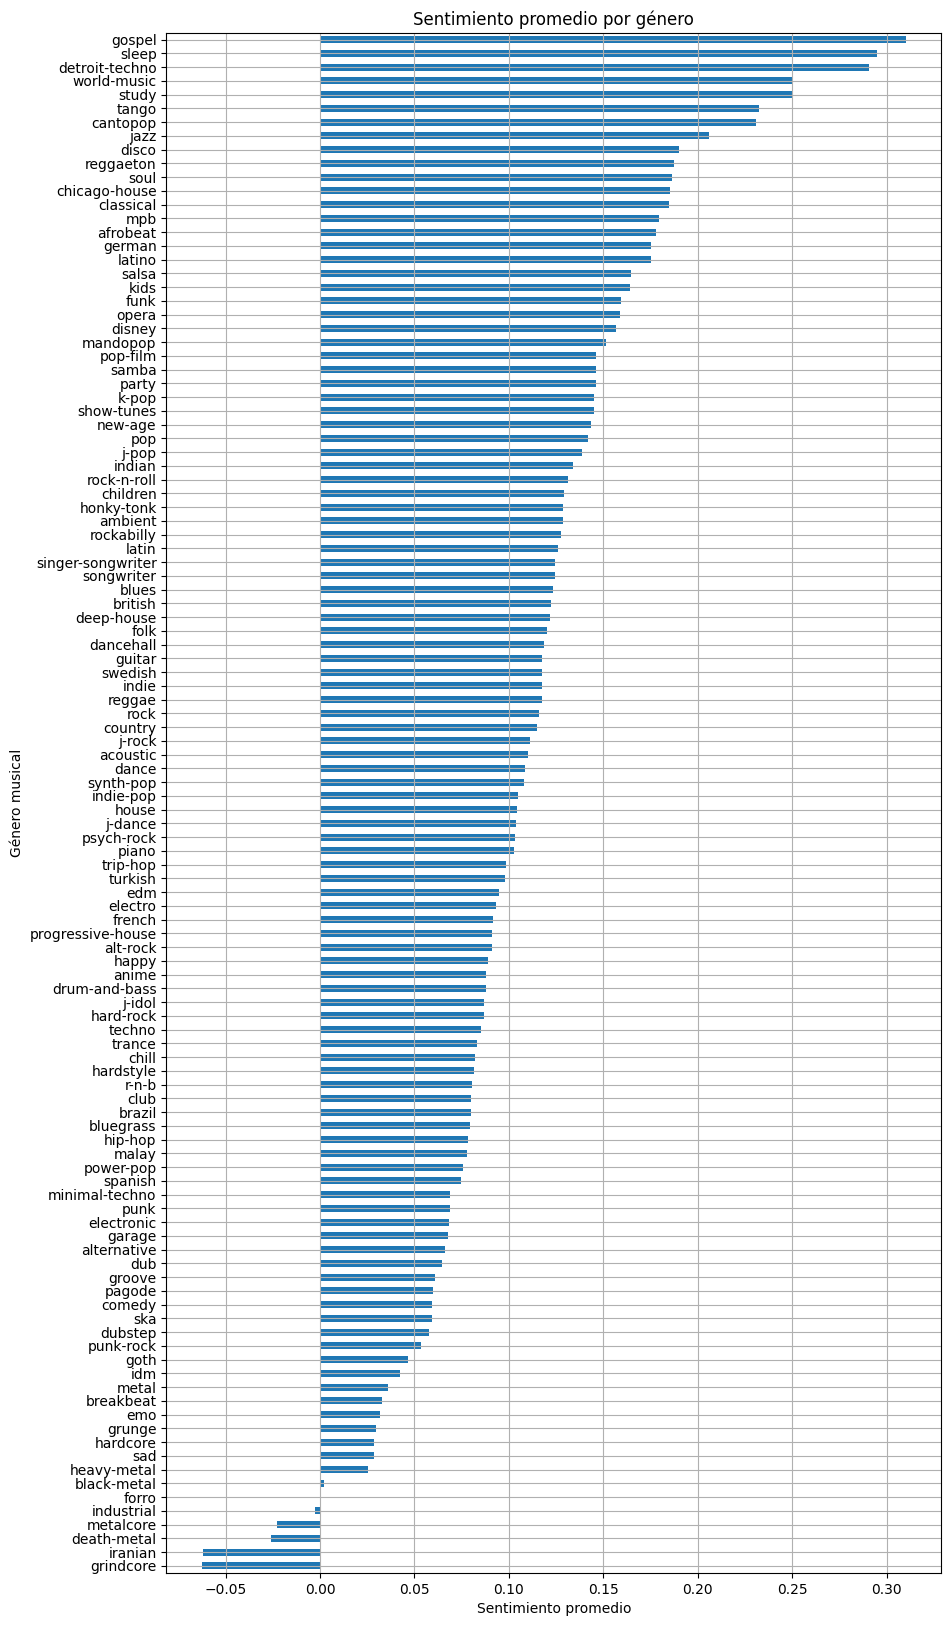

In [87]:
genero_sentimiento = spotify.groupby('track_genre')['sentimiento'].mean().sort_values()

# Mostrar los m√°s felices y m√°s tristes
genero_sentimiento.plot(kind='barh', figsize=(10, 20), title='Sentimiento promedio por g√©nero')
plt.xlabel('Sentimiento promedio')
plt.ylabel('G√©nero musical')
plt.grid()
plt.show()

En promedio, la mayor√≠a de los g√©neros tienen predominantemente sentimientos con polaridad positiva, a excepci√≥n de algunos como grindcore, iranian o death-metal.

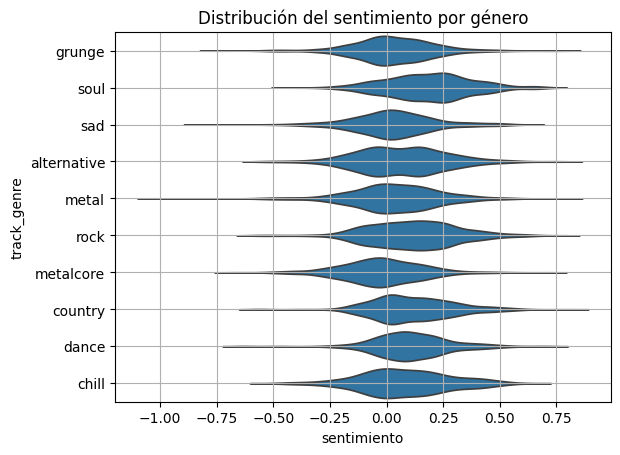

In [88]:
spotify_filtrado = spotify.dropna(subset=['lyrics'])

top_generos = spotify_filtrado['track_genre'].value_counts().head(10).index

sns.violinplot(data=spotify[spotify['track_genre'].isin(top_generos)], 
               x='sentimiento', y='track_genre', orient='h', inner=None, scale='width')
plt.title('Distribuci√≥n del sentimiento por g√©nero')
plt.grid()
plt.show()

Entre los g√©neros con m√°s representaci√≥n, se observa predominancia de sentimiento positivo, excepto metalcore.

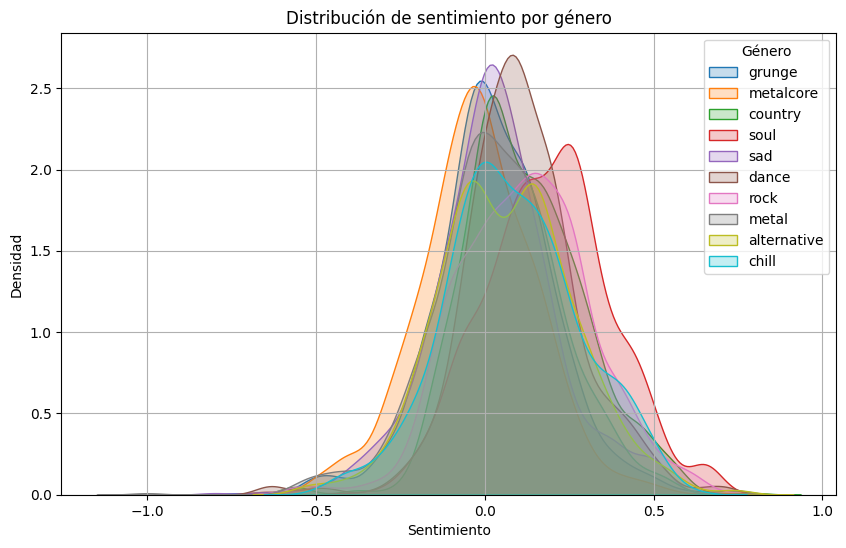

In [89]:
plt.figure(figsize=(10, 6))

for genero in top_generos:
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], label=genero, shade=True, common_norm=False)

plt.title('Distribuci√≥n de sentimiento por g√©nero')
plt.xlabel('Sentimiento')
plt.ylabel('Densidad')
plt.legend(title='G√©nero')
plt.grid()
plt.show()

Entre estos mismos g√©neros, soul es el que tiene una polaridad m√°s positiva.

En general, con la metodolog√≠a implementada de manera preliminar, es posible representar y caracterizar las canciones, asi como sus diferencias entre los distintos g√©neros.

Como pasos siguientes, en primer lugar, se debe mejorar la limpieza de los datos, en particular, el preprocesamiento de la letra. Por otra parte, se puede generar embeddings que capturen de mejor manera la sem√°ntica de cada letra, y que a su vez permitan caracterizar las canciones de una forma m√°s precisa. Adicionalmente, se puede a√±adir informaci√≥n relacionada al tiempo de lanzamiento o creaci√≥n, para realizar el mismo an√°lisis, pero considerando estas caracter√≠sticas.

# Pr√≥ximos pasos

Aplicando las mejoras propuestas en cada una de las preguntas, se puede probar el rendimiento del modelo de predicci√≥n de g√©nero al a√±adir sucesivamente nueva informaci√≥n, proveniente de la clusterizaci√≥n y de lo obtenido a trav√©s de NLP, verificando si aporta a aumentar las m√©tricas correspondientes.

Finalmente, se pueden enriquecer con m√°s informaci√≥n la base de datos completa, agregando atributos como los ya existentes, pero distribuidos a trav√©s del tiempo de duraci√≥n de cada registro, como por ejemplo, volumen promedio durante el 10% inicial de la canci√≥n, u otras caracter√≠sticas que contribuir√≠an a la predicci√≥n del g√©nero.

## Anexos

---

## P1

M√°s exploraci√≥n

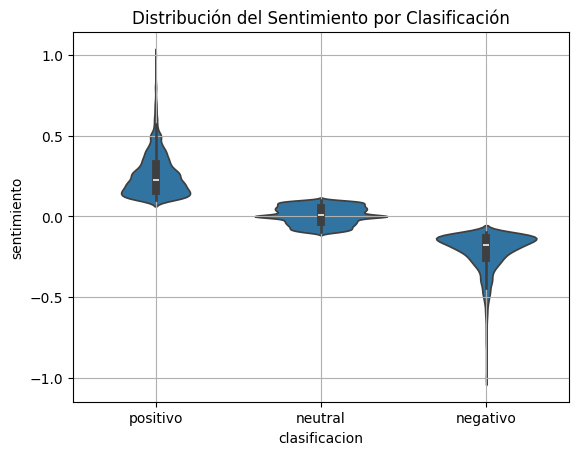

In [90]:
sns.violinplot(data=df2, x='clasificacion', y='sentimiento')
plt.title('Distribuci√≥n del Sentimiento por Clasificaci√≥n')
plt.grid()
plt.show()

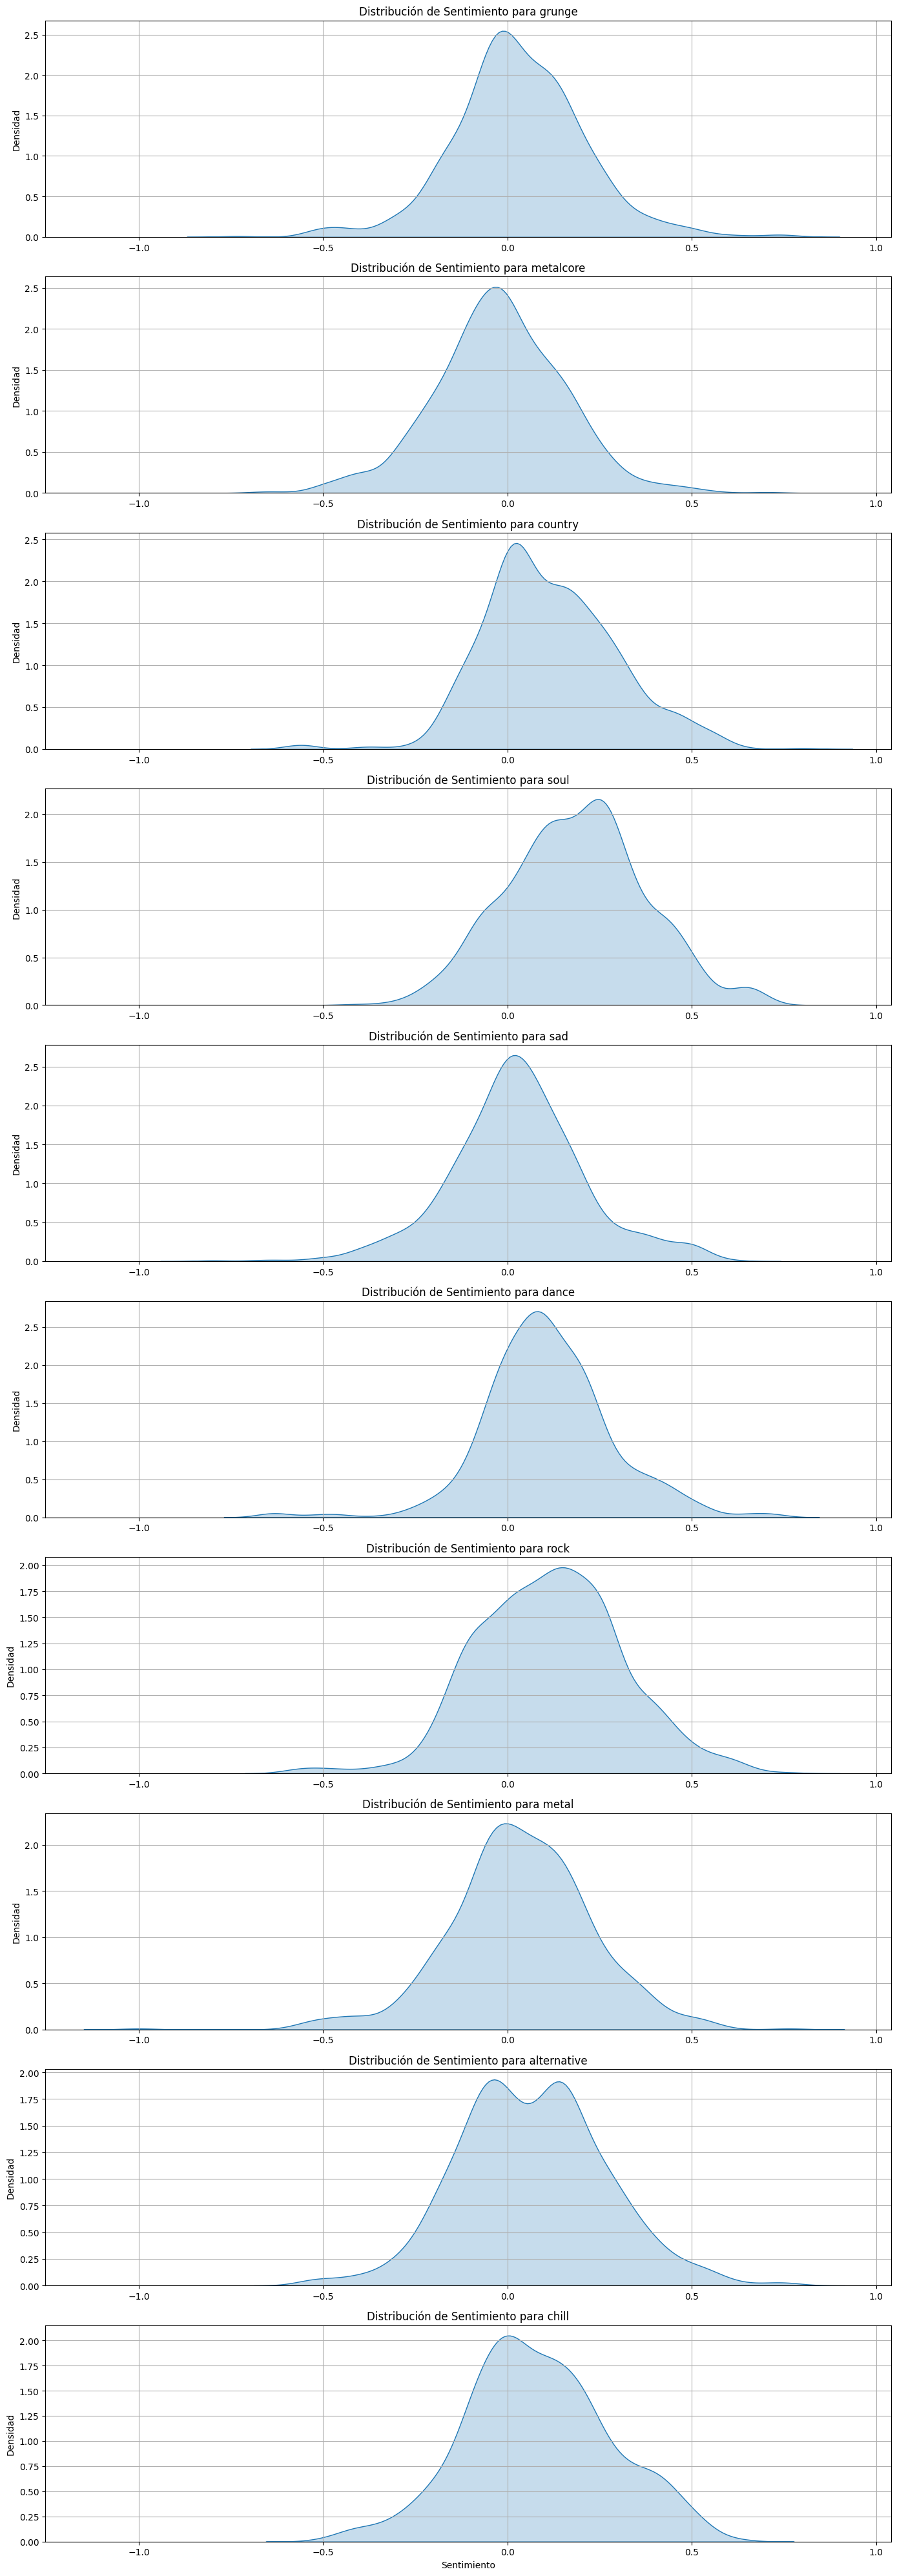

In [91]:
fig, axes = plt.subplots(len(top_generos), 1, figsize=(14, 4 * len(top_generos)), sharex=True)

for i, genero in enumerate(top_generos):
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], ax=axes[i], shade=True, common_norm=False)
    axes[i].set_title(f'Distribuci√≥n de Sentimiento para {genero}')
    axes[i].set_xlabel('Sentimiento')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', labelbottom=True)

plt.tight_layout()
plt.show()

Separando las disitribuciones, se puede confirmar que soul contiene canciones con sentimientos m√°s positivos, en comparaci√≥n al resto.